## Building a K-means model: Clustering Penguins

**Context:** The data is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. 

**Goal:**
Build a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv("penguins.csv")

In [3]:
penguins.head(n = 10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### EDA
Prepare data for clustering

In [4]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
penguins['species'].value_counts(dropna = False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Analysis**:
Among the 3 types of species, the Chinstrap species is less common than the others. This may affect K-means clustering as K-means performs best with similar sized groupings.

In [6]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

In [8]:
penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


In [10]:
# Encode data, convert to categorical to numeric for clustering later
penguins_subset['sex'] = penguins_subset['sex'].str.upper() 

In [11]:
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])

In [12]:
# Drop irrelevant columns
# Relate to Goal: Determine if penguins of the same species exhibit diff physical characteristics based on sex
penguins_subset = penguins_subset.drop(['island'], axis=1)

In [13]:
# Scale Features:
# Reason: K-Means uses distance btw observations as its measure of similarity
X = penguins_subset.drop(['species'], axis=1) 
X_scaled = StandardScaler().fit_transform(X)

## Data Modelling
Fit K-means and evaluate inertia for different values of k.
Since unknown number of clusters, examine inertia values for different values of k.

In [14]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [15]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.622414365225,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.92858573807678,
 201.39287843423267,
 185.461310432323,
 173.4545211497985,
 164.1200152026071]

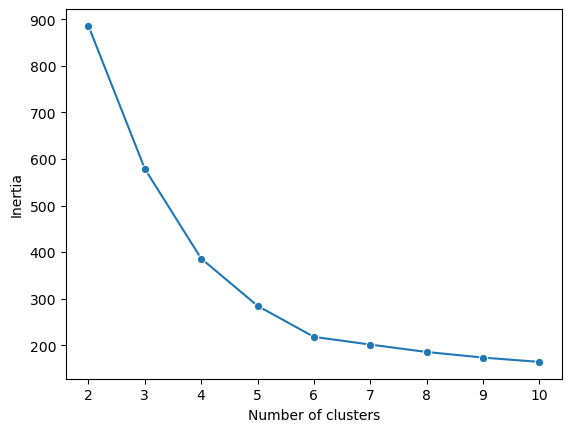

In [16]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

**Analysis:**
The plot seems to depict an elbow at six clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked (which is to study the distance between clusters).

## Results and evaluation

In [17]:
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.4221920732643224,
 0.36062890821417276,
 0.3617250563420018]

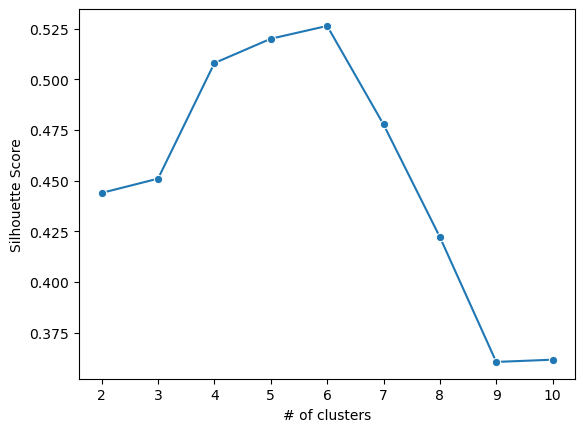

In [18]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

**Analysis:**
The plot indicates that the silhouette score is closest to 1 (samples are far away from neighbouring clusters) when the data is partitioned into 6 clusters, although 5 clusters also yield a relatively good silhouette score.

### Optimal k-value
To decide on an optimal k-value, fit a six-cluster model to the dataset.

In [19]:
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [20]:
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [21]:
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,2
1,Adelie,39.5,17.4,186.0,3800.0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,1,2


In [22]:
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Gentoo       58
1        Adelie       73
         Chinstrap     5
2        Adelie       71
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Chinstrap    29
dtype: int64

**Analysis**:
The results of the groupby show that each `'cluster'` can be differentiated by `'species'`, thus best to visualize these results.  

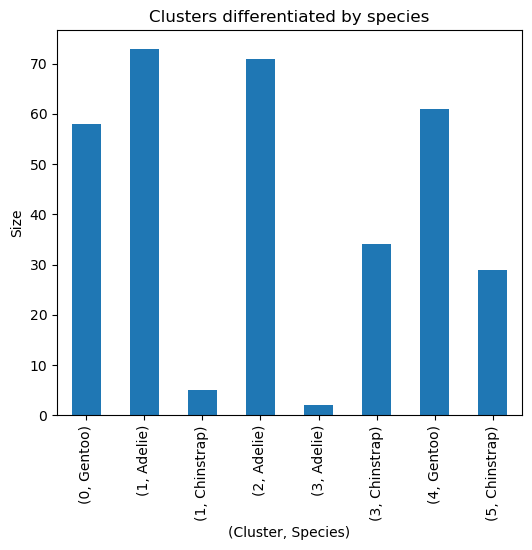

In [23]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [24]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.
penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
1        Adelie     0           73
2        Adelie     1           71
4        Gentoo     1           61
0        Gentoo     0           58
3        Chinstrap  1           34
5        Chinstrap  0           29
1        Chinstrap  0            5
3        Adelie     1            2
dtype: int64

**Analysis**:
Even though clusters 1 and 3 weren't all one species or sex, the groupby indicates that the algorithm produced clusters mostly differentiated by species and sex.

Thus take it as the graph shows that each 'cluster' can be differentiated by 'species' and 'sex_MALE'. Furthermore, each cluster is mostly comprised of one sex and one species.

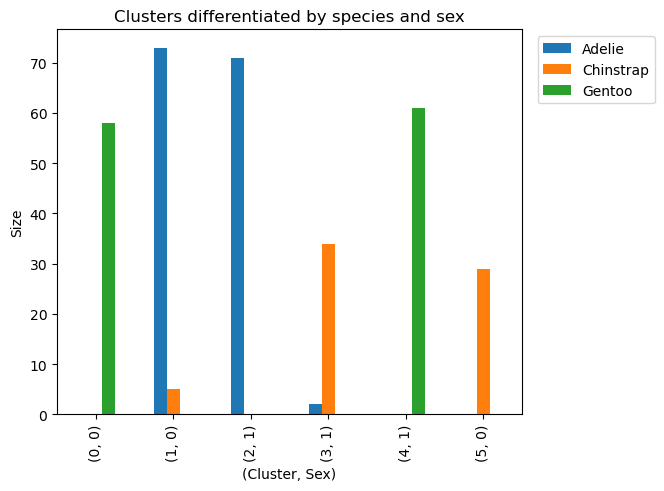

In [25]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## Conclusion
Key takeaways that you learned during this lab
- The clusters in this lab are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs.
- The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
- Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).

Summary for stakeholders:
- The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
- The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.

**References**
NTU-Google Scholarship - Google Advanced Data Analytics